<a href="https://colab.research.google.com/github/alison-engfis/alison-engfis/blob/main/nivel_st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TESTANDO O STREAMLIT PARA VISUALIZAÇÃO DOS DADOS

In [ ]:
!pip install streamlit

In [2]:
import pandas as pd
import matplotlib.pyplot as plt #por algum motivo não funcionou com o seaborn, então vamos de matplot
import streamlit as st

In [3]:
df = pd.read_csv('sph4_out.csv', sep= ',')

print(df.columns)

Index(['% year', ' month', ' day', ' hour', ' minute', ' second (GMT/UTC)',
       ' water level (meters)'],
      dtype='object')


In [4]:
df.tail(10)

,% year,month,day,hour,minute,second (GMT/UTC),water level (meters)
51625,2024,9,24,10,50,0,1.158
51626,2024,9,24,11,0,0,1.156
51627,2024,9,24,11,10,0,1.155
51628,2024,9,24,11,20,0,1.154
51629,2024,9,24,11,30,0,1.153
51630,2024,9,24,11,40,0,1.152
51631,2024,9,24,11,50,0,1.152
51632,2024,9,24,12,0,0,1.151
51633,2024,9,24,12,10,0,1.151
51634,2024,9,24,12,20,0,1.150


In [6]:
# Função para carregar os dados

@st.cache  # Cache para evitar recarregamento dos dados em cada interação
def load_data():
    # Carregar os dados (ajustando o necessário)

    df = pd.read_csv('sph4_out.csv', sep= ',')

    df.rename(columns= {'% year' : 'year', ' month' : 'month', ' day' : 'day', ' hour' : 'hour', ' minute' : 'minute', ' second (GMT/UTC)' : 'second',
                        ' water level (meters)' : 'water_level(m)'}, inplace= True)

    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])

    return df

2024-09-24 16:02:10.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 16:02:10.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 16:02:10.206 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

2024-09-24 16:02:10.209 No runtime found, using MemoryCacheStorageManager


2024-09-24 16:02:13.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 16:02:13.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 16:02:13.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 16:02:13.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 16:02:13.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 16:02:13.287 No runtime found, using MemoryCacheStorageManager
2024-09-24 16:02:13.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 16:02:13.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 16:02:13.397 Thread 'MainThread':

DeltaGenerator()

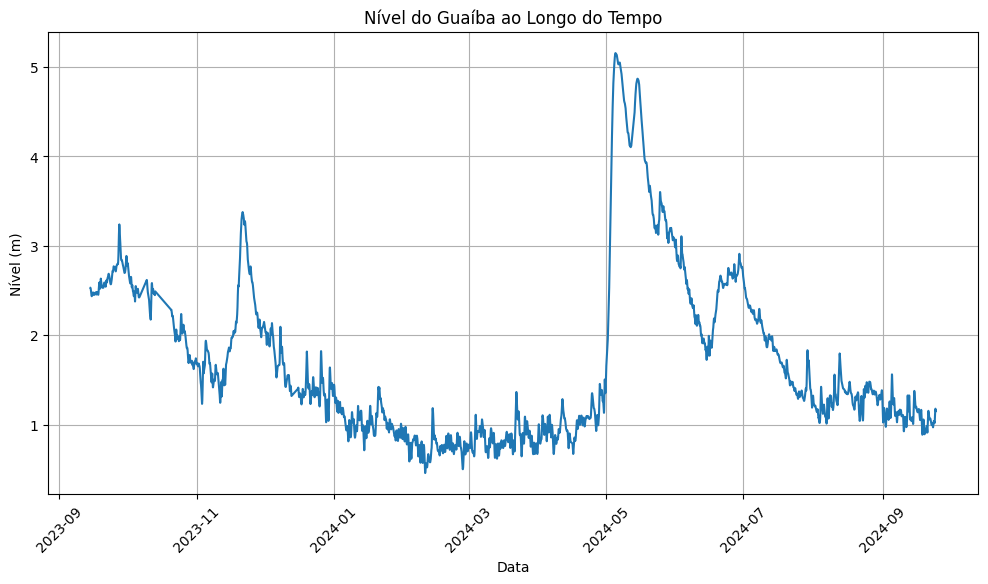

In [7]:
# Título
st.title("Monitoramento do Nível do Guaíba")

# Carregar os dados
data = load_data()

# Tabela contendo os dados
st.write("Dados de Nível:")
st.dataframe(data[['datetime', 'water_level(m)']])

# Plot
st.write("Gráfico do Nível de Água ao Longo do Tempo:")
fig, ax = plt.subplots(figsize= (12, 6))
ax.plot(data['datetime'], data['water_level(m)'], linestyle= '-')
ax.set_xlabel('Data')
ax.set_ylabel('Nível (m)')
ax.set_title('Nível do Guaíba ao Longo do Tempo')
plt.xticks(rotation= 45)
plt.grid(True)

# Gráfico no Streamlit
st.pyplot(fig)